## Model Calibration Recap

In [243]:
import pandas as pd

data = pd.read_csv("data.csv")

data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


## Scaling and drop nans

In [244]:
from sklearn.preprocessing import MinMaxScaler

data = data.dropna()

scaler = MinMaxScaler()

X = scaler.fit_transform(data.drop(columns="target_5y"))

y = data['target_5y']

## Split 

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 7)

## Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict_proba(X_test)

y_pred

array([[0.61112265, 0.38887735],
       [0.28911663, 0.71088337],
       [0.19915766, 0.80084234],
       [0.71513299, 0.28486701],
       [0.56010955, 0.43989045],
       [0.70920375, 0.29079625],
       [0.63382628, 0.36617372],
       [0.55904431, 0.44095569],
       [0.09217954, 0.90782046],
       [0.53475815, 0.46524185],
       [0.39066677, 0.60933323],
       [0.46703046, 0.53296954],
       [0.29199599, 0.70800401],
       [0.23122279, 0.76877721],
       [0.05690578, 0.94309422],
       [0.31135833, 0.68864167],
       [0.17493984, 0.82506016],
       [0.55459234, 0.44540766],
       [0.69562268, 0.30437732],
       [0.71059442, 0.28940558],
       [0.14601912, 0.85398088],
       [0.6127066 , 0.3872934 ],
       [0.20714368, 0.79285632],
       [0.52582659, 0.47417341],
       [0.14459406, 0.85540594],
       [0.66207901, 0.33792099],
       [0.39361947, 0.60638053],
       [0.10447589, 0.89552411],
       [0.26071552, 0.73928448],
       [0.59964451, 0.40035549],
       [0.

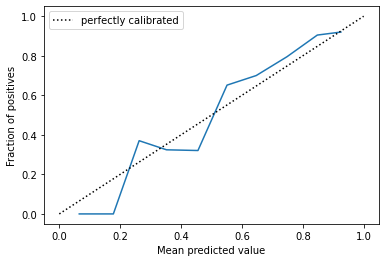

In [251]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred[:,1], n_bins = 10 )

plt.plot(mean_predicted_value,fraction_of_positives)
plt.plot([0,1],[0,1],"k:", label = "perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.legend()

## SVM

## Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

search_space = {'min_samples_split':randint(1,25),'max_depth':randint(1,25)}

search = RandomizedSearchCV(rf,search_space,n_jobs=-1, scoring = 'accuracy', cv=10, n_iter = 50)

search.fit(X_train,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x133a87d90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x133a87c90>},
                   scoring='accuracy')

In [265]:
rf_model = search.best_estimator_

y_pred_rf = rf_model.predict(X_test)

In [266]:
accuracy_score(y_test,y_pred_rf)

0.6917293233082706

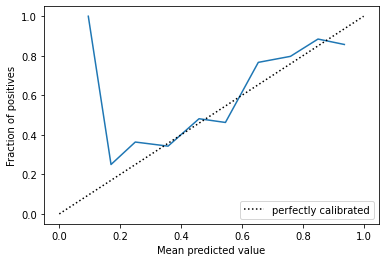

In [257]:

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_rf[:,1], n_bins = 10 )

plt.plot(mean_predicted_value,fraction_of_positives)
plt.plot([0,1],[0,1],"k:", label = "perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.legend()

## Calibrating the Random Forest

In [263]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

rf_calibrated = CalibratedClassifierCV(rf, cv=10, method = "isotonic")

rf_calibrated.fit(X_train, y_train)

y_pred_calibrated = rf_calibrated.predict(X_test)

accuracy_score(y_test,y_pred_calibrated)

0.6942355889724311

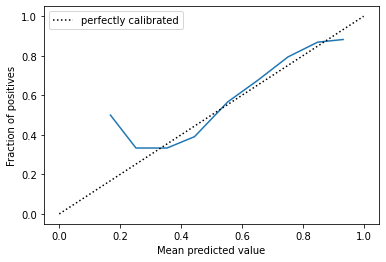

In [259]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_calibrated[:,1], n_bins = 10 )

plt.plot(mean_predicted_value,fraction_of_positives)
plt.plot([0,1],[0,1],"k:", label = "perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.legend()